In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from __future__ import division, print_function

%pylab inline
figsize(20, 16)

Populating the interactive namespace from numpy and matplotlib


## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>2 балла. <br> <br>
<br> Пропуски плохо заполнять средними значениями из-за выбросов. 
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>3 балла.
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>3 балла </font>

## <font color='green'>Итого: 9 баллов (округл.)</font>

In [2]:
from sklearn.preprocessing import OneHotEncoder

 ## Описание данных
 
Ниже приведены реальные данные скорринга POS-кредитов, целевая переменная - взял ли человек одобренный ему кредит. Цель работы поcтроить модель, предсказывающую возьмет ли человек одобренный ему кредит.

Данные реальные, география - РФ.
Информация обезличена и не является конфиденциальной, однако прошу сами исходные данные не пересылать и не использовать без предварительного согласования :) 

 ## Описание параметров
 1. 'gender' - пол
 2. 'age' - возраст
 3. 'marital_status' - семейное положение
 4. 'job'- тип работы
 5. 'loan_amount' - размер кредита
 6. 'maturity' - срок кредита
 7. 'tarif' - ставка по кредиту
 8. 'PD' - (Probability of default) балл по скорингу
 9. 'education' - образование
 10. 'region' - регион
 11. 'income' - доход
 12. 'num_loans' - число кредитов
 13. 'num_dels' - число просрочек
 14. 'account' - целевая переменная

## Задачи предварительного анализа

1. Сделать первичный анализ признаков
2. Заполнить пропуски
3. Сделать оценку значимости параметров (случайный лес)

In [71]:
data = pd.read_excel('./data/data.xlsx', index_col='id')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193550 entries, 73034848 to 82239219
Data columns (total 14 columns):
gender            193550 non-null object
age               193550 non-null int64
marital_status    181892 non-null object
job               185680 non-null object
loan_amount       193545 non-null float64
maturity          193545 non-null float64
tarif             193550 non-null float64
PD                193544 non-null float64
education         193541 non-null object
region            193521 non-null object
income            193541 non-null float64
num_loans         192011 non-null float64
num_dels          192011 non-null float64
account           193550 non-null int64
dtypes: float64(7), int64(2), object(5)
memory usage: 22.2+ MB


In [5]:
data.head(20)

,gender,age,marital_status,job,loan_amount,maturity,tarif,PD,education,region,income,num_loans,num_dels,account
id,,,,,,,,,,,,,,
73034848,M,58,CIV,SPC,18711.00,24.0,1.1,0.00463,GRD,ОБЛ НИЖЕГОРОДСКАЯ,50000.0,6.0,0.0,0
74626327,M,50,MAR,WRK,24500.00,24.0,1.1,0.00912,GRD,МОСКВА,70000.0,3.0,0.0,0
74751170,F,60,WID,SPC,71440.00,10.0,1.5,0.04636,SCH,МОСКВА,100000.0,3.0,0.0,1
74757456,F,47,MAR,SPC,41734.07,6.0,1.4,0.01139,SCH,САХАЛИНСКАЯ ОБЛАСТЬ,40000.0,5.0,0.0,0
74757464,M,42,MAR,SPC,34515.00,24.0,1.1,0.01572,GRD,КРАСНОДАРСКИЙ КРАЙ,40000.0,2.0,0.0,0
74757480,M,42,MAR,SPC,12358.00,12.0,1.4,0.01701,GRD,СВЕРДЛОВСКАЯ ОБЛ,60000.0,4.0,0.0,0
74757598,F,29,MAR,SPC,12411.00,12.0,1.5,0.07449,SCH,ОБЛ АМУРСКАЯ,30000.0,6.0,0.0,0
74757798,F,53,MAR,SPC,16847.00,10.0,1.4,0.03990,SCH,ЧЕЛЯБИНСКАЯ ОБЛ,27000.0,4.0,0.0,0
74757836,M,31,MAR,SPC,16792.00,12.0,1.6,0.02070,SCH,СТАВРОПОЛЬСКИЙ КРАЙ,30000.0,4.0,0.0,0


In [6]:
# Проверка сбалансированности классов - дисбаланс есть, но он разумный
data.account.value_counts()

0    170305
1     23245
Name: account, dtype: int64

In [7]:
data.columns

Index(['gender', 'age', 'marital_status', 'job', 'loan_amount', 'maturity',
       'tarif', 'PD', 'education', 'region', 'income', 'num_loans', 'num_dels',
       'account'],
      dtype='object')

In [8]:
data.describe(include ='all')

,gender,age,marital_status,job,loan_amount,maturity,tarif,PD,education,region,income,num_loans,num_dels,account
count,193550,193550.000000,181892,185680,193545.000000,193545.000000,193550.000000,193544.000000,193541,193521,193541.000000,192011.000000,192011.000000,193550.000000
unique,2,NaN,5,13,NaN,NaN,NaN,NaN,5,318,NaN,NaN,NaN,NaN
top,F,NaN,MAR,SPC,NaN,NaN,NaN,NaN,SCH,ОБЛ МОСКОВСКАЯ,NaN,NaN,NaN,NaN
freq,97029,NaN,105207,153261,NaN,NaN,NaN,NaN,101775,12446,NaN,NaN,NaN,NaN
mean,NaN,37.513702,NaN,NaN,23380.062463,10.495239,1.369668,0.044672,NaN,NaN,38307.302411,2.125816,0.037711,0.120098
std,NaN,10.696901,NaN,NaN,14853.287833,3.938700,0.193271,0.030229,NaN,NaN,23949.730203,1.823908,0.191806,0.325077
min,NaN,18.000000,NaN,NaN,1647.000000,3.000000,1.000000,0.000480,NaN,NaN,2024.000000,0.000000,0.000000,0.000000
25%,NaN,29.000000,NaN,NaN,12869.000000,10.000000,1.140000,0.020430,NaN,NaN,25000.000000,1.000000,0.000000,0.000000
50%,NaN,35.000000,NaN,NaN,19520.450000,10.000000,1.400000,0.038360,NaN,NaN,33000.000000,2.000000,0.000000,0.000000
75%,NaN,44.000000,NaN,NaN,29000.000000,12.000000,1.500000,0.063720,NaN,NaN,46000.000000,3.000000,0.000000,0.000000


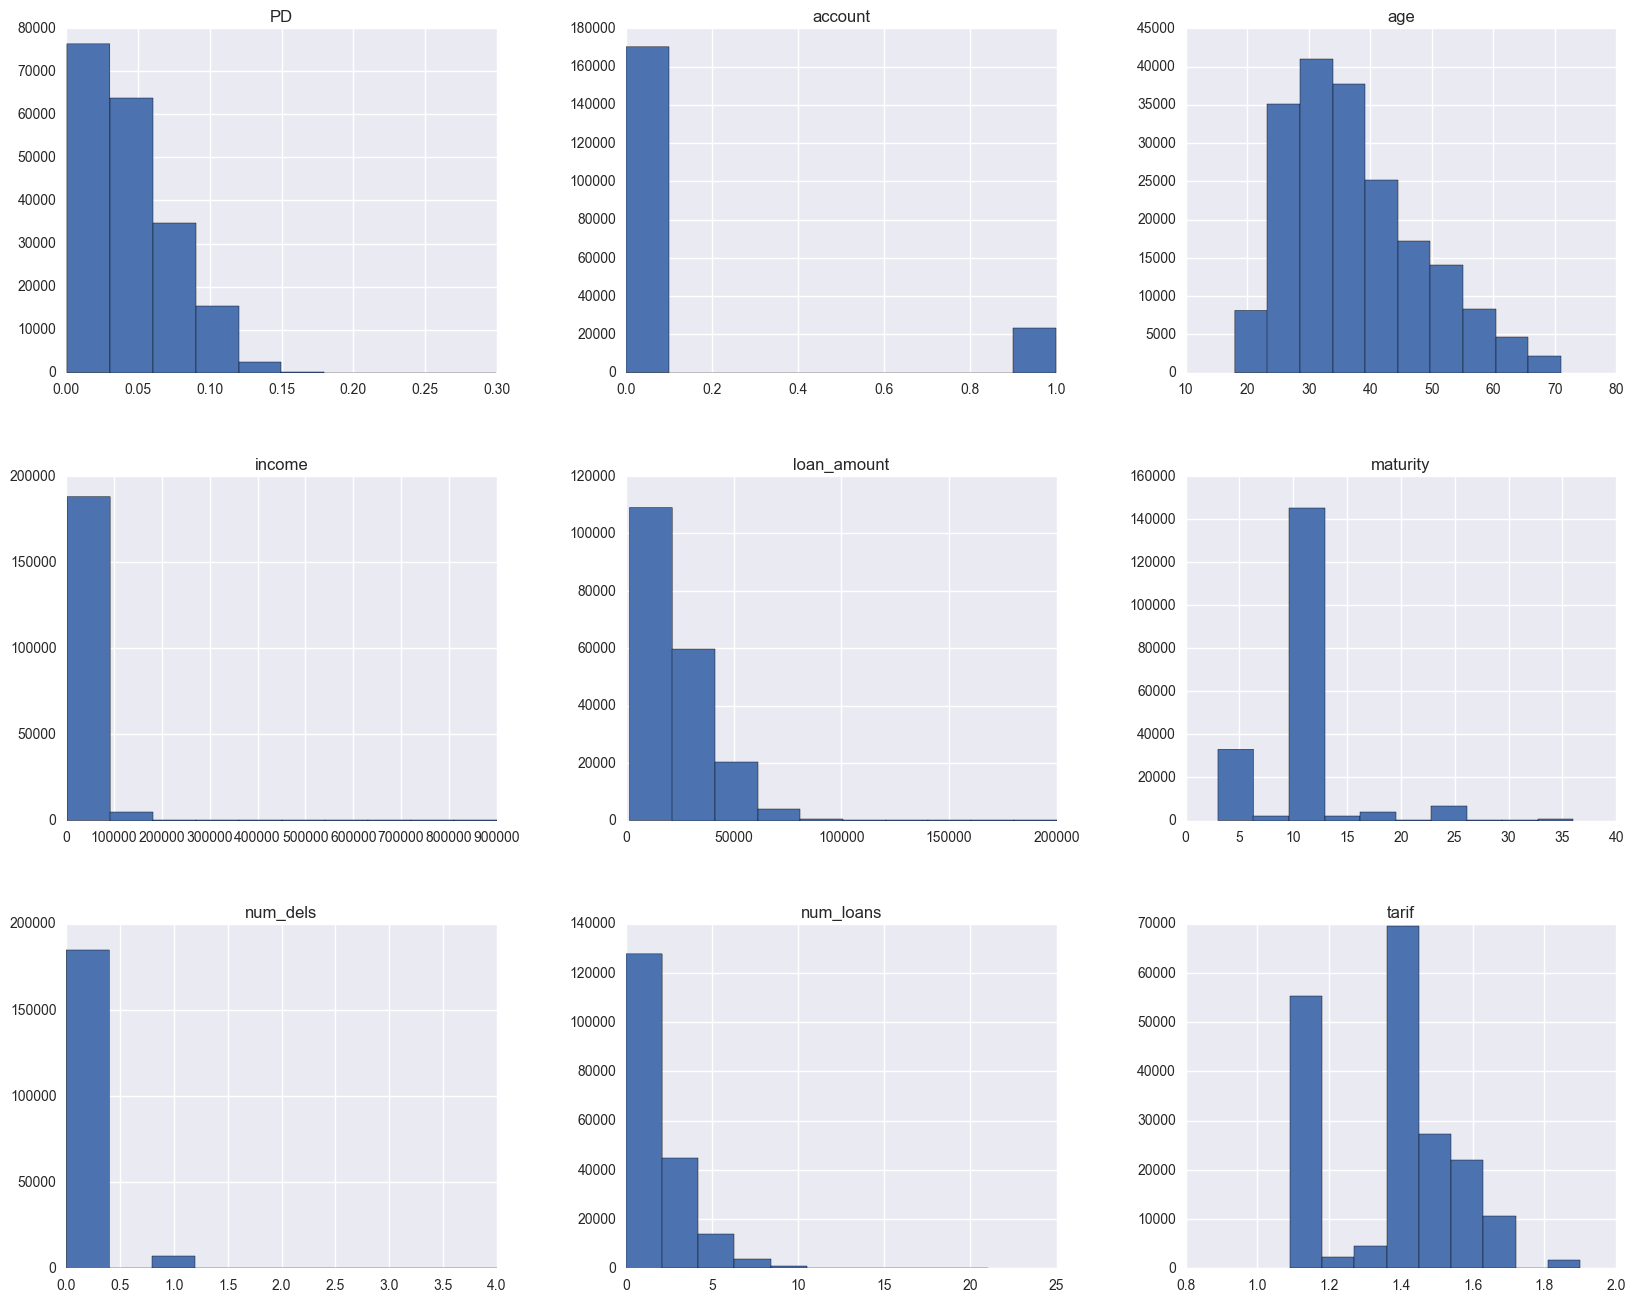

In [9]:
data.hist();

**Посмотим на числовые признаки**

1) Вероятность дефолта (PD). У меня нет детальной информации по данной переменной, но думаю значение должно быть в интервале от 0 до 1, а значит модель скорринга у данного банка весьма консервативна, большая часть заявителей имеет довольно низкую вероятность дефолта, большое кол-во с показателем в интервале от нуля до 0,05, те очень близким к нулю.

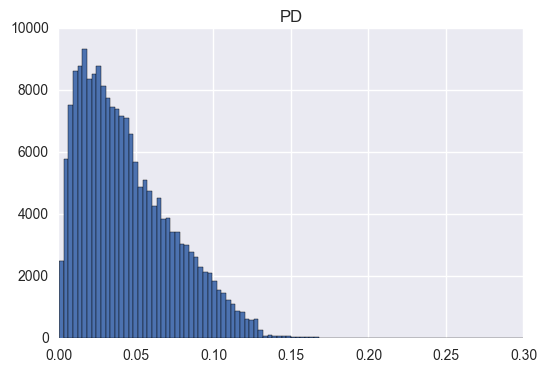

In [10]:
figsize(6, 4)
data.hist('PD', bins = 100);

2) Возраст - почти нормальное распределение, средний возраст заемщика 37 лет, минимальный 18 лет, максимальный 71 год.

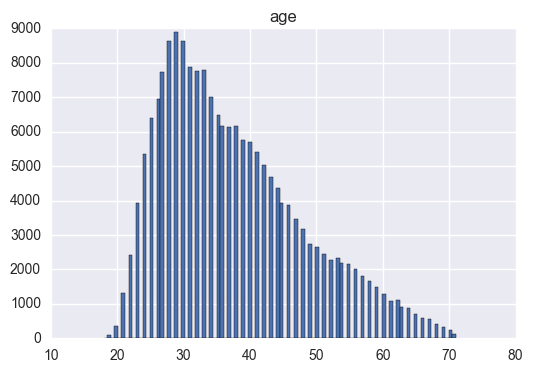

In [11]:
figsize(6, 4)
data.hist('age', bins = 100);

3) Срок кредита

Самый популярный срок - 10 и 12 месяцев.

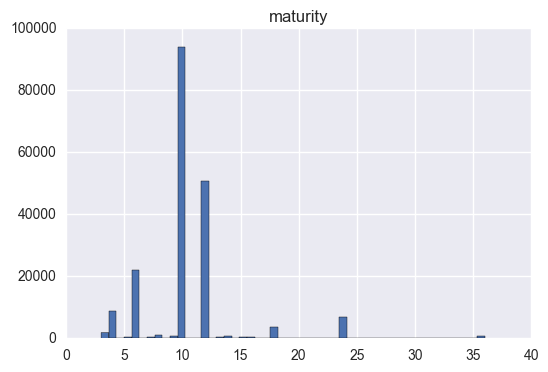

In [12]:
figsize(6, 4)
data.hist('maturity', bins = 50);

И если посмотреть на целевую переменную, то видно, что в целом для коротких сроков люди проще соглащаются на то, чтобы взять одобренный кредит, чем для длинных. Для 3х месяцев вообще почти все берут, потом эта доля снижается и для 10/12 месяцев это уже совсем небольшой %. И интересно, что для 18 месяцев относительная доля взявших снова растет, уже почти треть согласились.

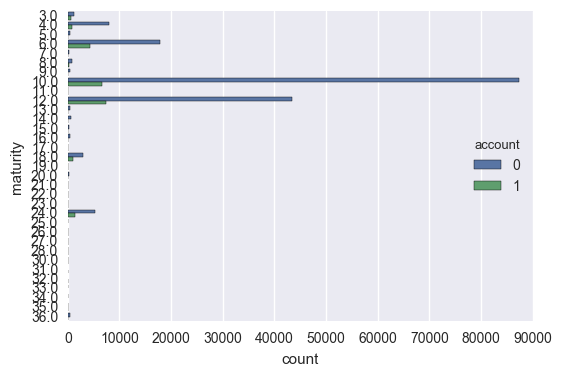

In [13]:
sns.countplot(y="maturity", hue = 'account', data = data)

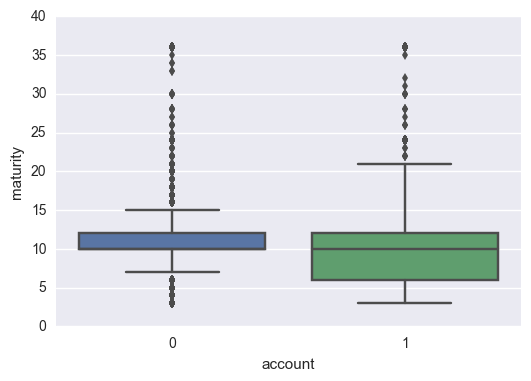

In [14]:
sns.boxplot(x = 'account', y = 'maturity', data = data)

В целом же диапазоны сроков кредита для тех, кто взял и нет сильно отличаются. Здесь напрашивается отдельный признак, срок кредита меньше 10 мес., где будет больше тех, кто согласился.

4) Доход заявителей в среднем небольшой, но для РФ и не низкий - 38 тыс. руб., распределение близко к нормальному, есть смещение в сторону более низкого дохода, что для такого типа кредитов нормлаьно. Смущает большой хвост выбросов с очень большим доходом, максимальное значение 900 000 тыс.

Точно имеет смысл убрать выбросы и ввести дополнительный признак интервалы по доходу от 0 до 25 тр, от 25 до 33 тр, от 33 тр до 45 тр и более 45 тр (по квартилям).

In [15]:
data['income'].describe()

count    193541.000000
mean      38307.302411
std       23949.730203
min        2024.000000
25%       25000.000000
50%       33000.000000
75%       46000.000000
max      900000.000000
Name: income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7deba8>]], dtype=object)

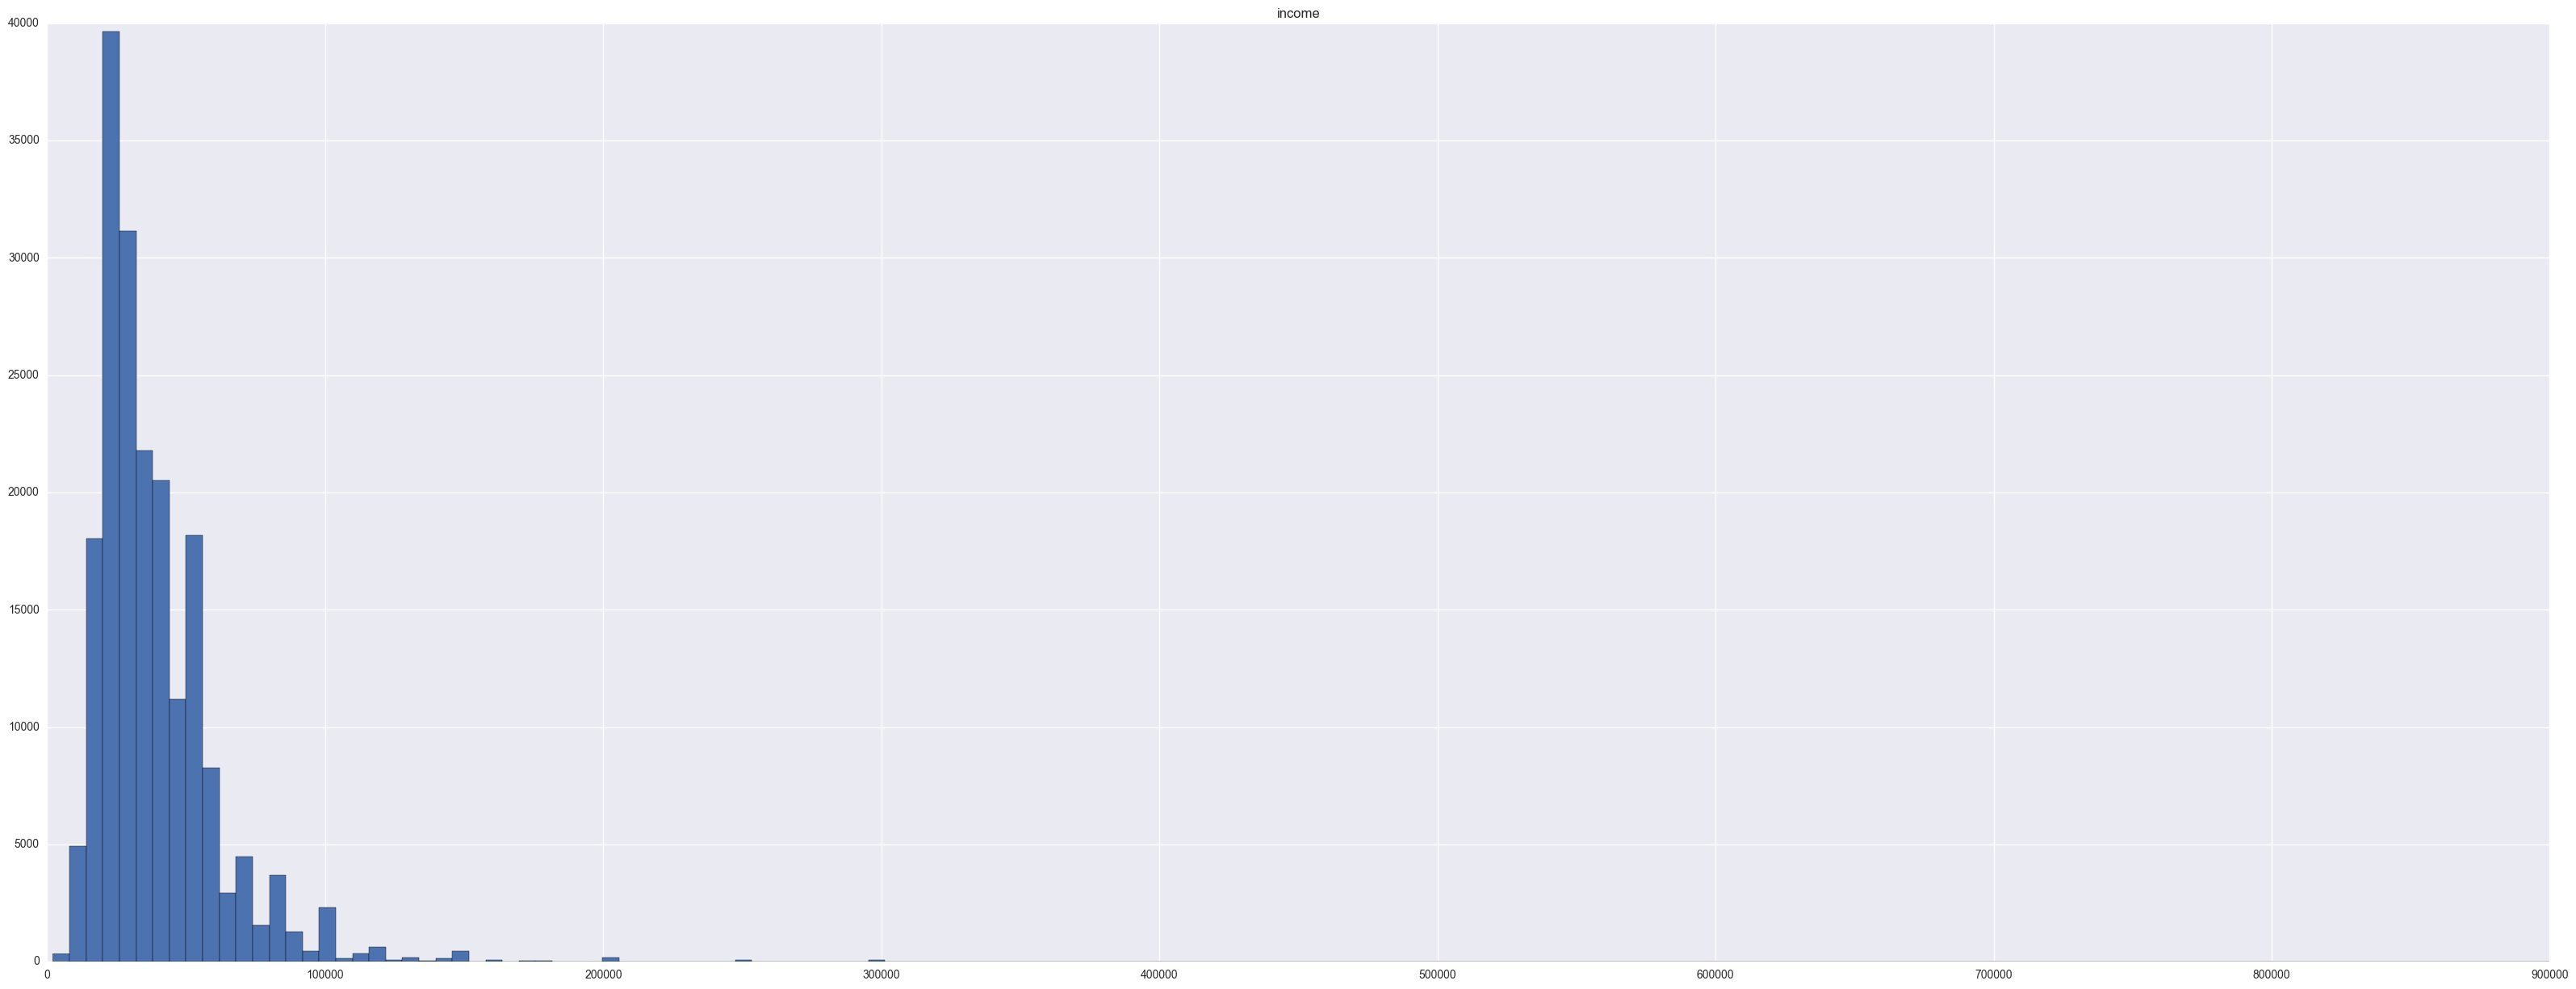

In [69]:
figsize(40,15)
data.hist('income', bins =150)

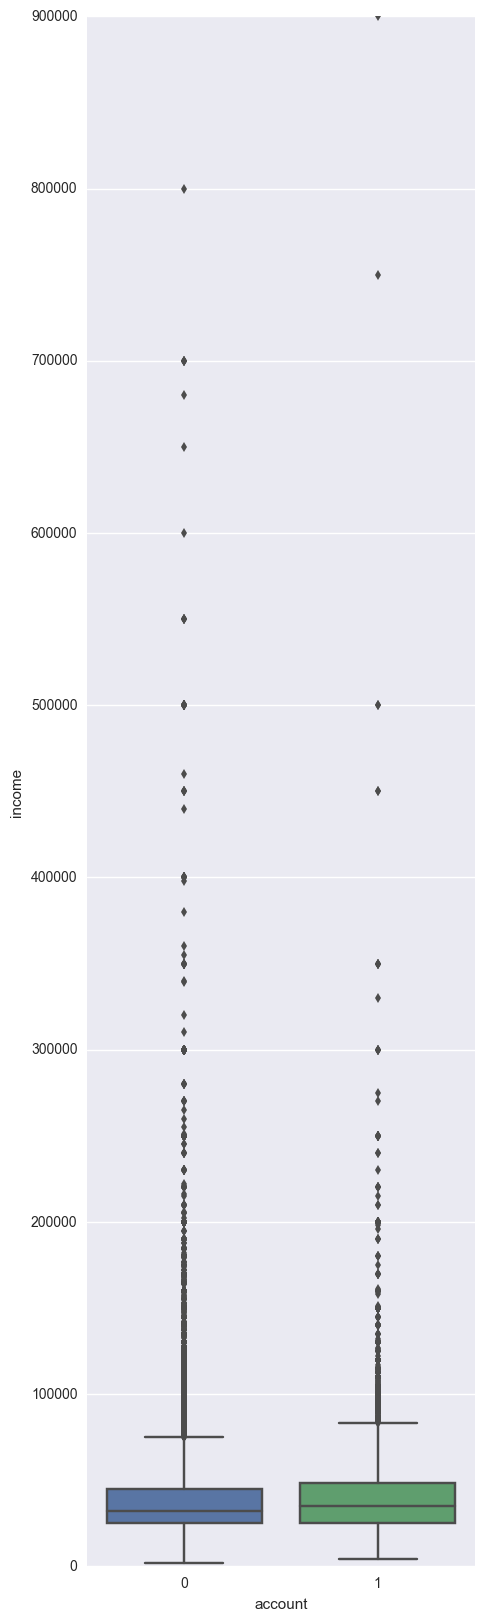

In [77]:
figsize(5,20)
sns.boxplot(y="income", x = 'account', data = data)

Очень большой хвост выбросов, пришлось растянуть картинку, чтобы было лучше видно распределение в 2х группах взял/не взял кредит. Очевидно, что этот хвост нужно будет убирать.

При этом какого то явного смещения в статистиках по целевому признаку нет и среднее в обеи группах очень близкое по значению.

In [18]:
data[data['account']==1.0]['income'].std(), \
data[data['account']==0.0]['income'].std()

(24854.924249876294, 23821.458945986535)

5) Число кредитов

У большей части заемщиков ни одного или не более двух/трех кредитов.

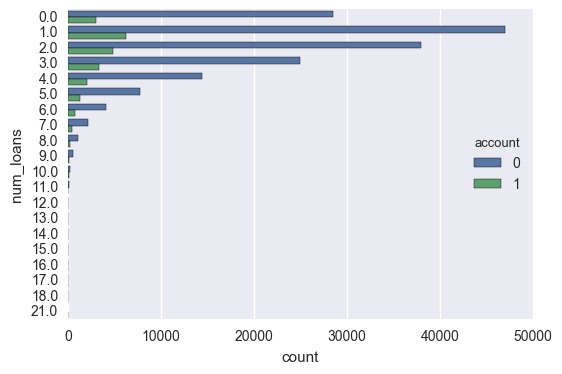

In [19]:
sns.countplot(y = 'num_loans', hue = 'account', data = data)

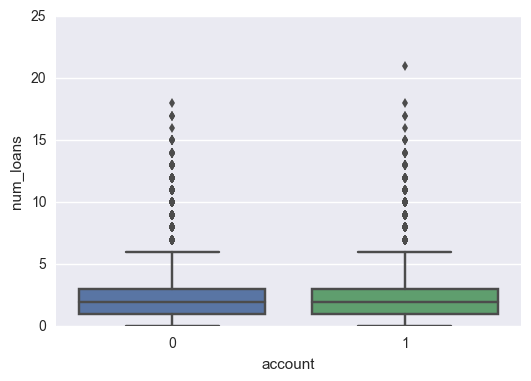

In [20]:
sns.boxplot(x = 'account', y = 'num_loans', data = data)

И большой связи между кол-вом кредитов и целевым признаком я не вижу.

6) Тариф

Расшифровка


- 1.1	- 51%
- 1.13	- 44%
- 1.14	- 28,70%
- 1.15	- 25,30%
- 1.16	- 23,50%
- 1.17	- 19,90%
- 1.19	- 26,40%
- 1.2	- 23,40%
- 1.20	- 30,10%
- 1.21	- 34,90%
- 1.22	- 41,50%
- 1.23	- 51,30%
- 1.24	- 22,30%
- 1.25	- 25,40%
- 1.26	- 29,50%
- 1.27	- 31,50%
- 1.28	- 43,30%
- 1.3	- 39,99%
- 1.4	- 69,99%
- 1.5	- 79,99%
- 1.6	- 89,99%
- 1.7	- 94,90%
- 1.9	- 46,90%

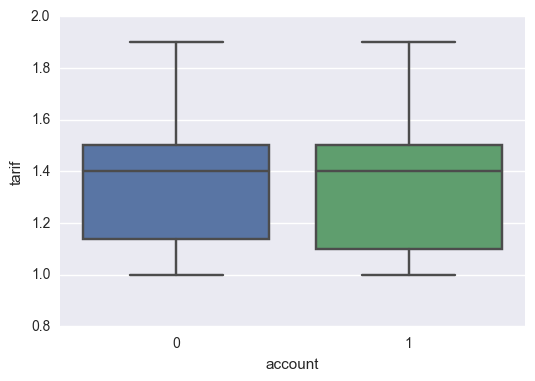

In [21]:
figsize(6, 4)
sns.boxplot(x='account', y = 'tarif', data = data)

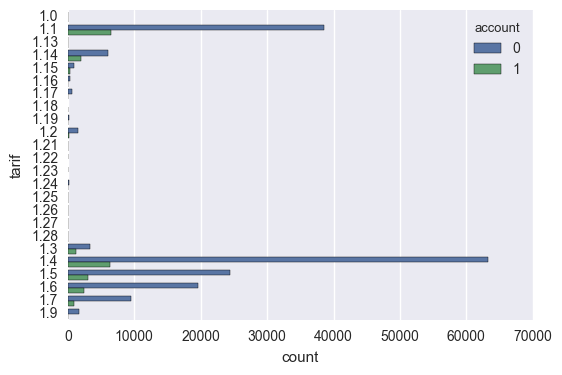

In [22]:
sns.countplot(y = 'tarif', hue = 'account', data = data)

Интересно, что хороший показатель оформляемости кредитов по тарифу 1.3 - 39,99% не смотря уже на достаточно большую ставку. Также очень привлекателен для заемщиков получился тариф 1.14 - 28,70%, при том что он не самый низкий!

Самый предлагаемый банком тариф 1.4 - 69,99%, на втором месте 1.1 - 51%, у них успех уже сильно ниже. Конечно, это логично, чем выше ставка, тем меньше берут, хотя у "жутких" тарифов  1.5 - 79,99%, 1.6 - 89,99% относительно не так уж и все плохо.

7) Число просрочек -  здесь довольно скучный признак, у большинства просрочек не было вообще. Ничего интересного не могу вытащить. Если вспомнить про признак - PD  - вероятность дефолта, и связать этим признаком, то видно скорринг достаточно жесткий и отсеивали очень хорошо.

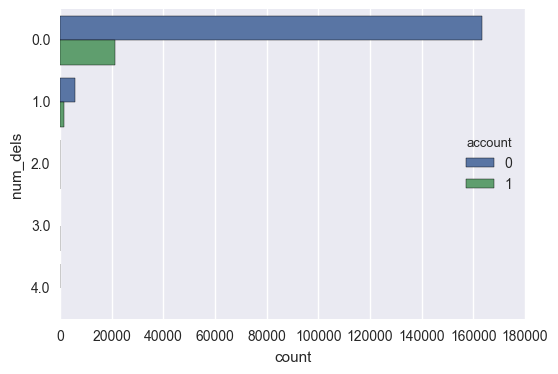

In [23]:
figsize(6, 4)
sns.countplot(y = 'num_dels', hue = 'account', data = data)

### Посмотрим на корреляцию признаков

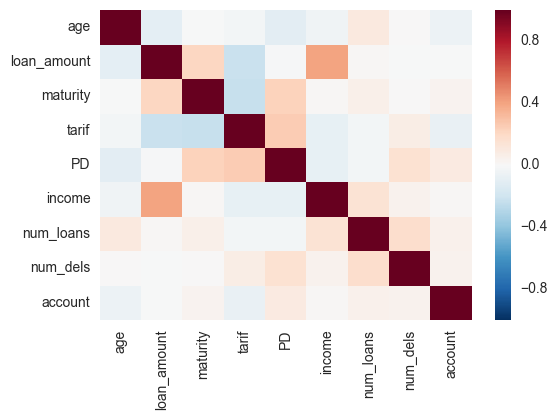

In [24]:
sns.heatmap(data.corr())

1) Есть явная положительная корреляция между размером дохода и размером кредита

2) Также есть небольная положительная связь между сроком кредита и размером кредита, что логично для такого типа кредитования. Кредиты берутся на покупки в магазине, очевидно люди не самые состоятельные берут такие кредиты, так что чем больше сумма кредита, тем больше и срок выплаты.

3) Есть положительная связь между признаком "PD"  (вероятность дефолта) и тарифом, эта связь видимо понятным образом регулируется разработчиками банковских продуктов для разных групп заемщиков. Чем выше риск, тем выше тариф. 

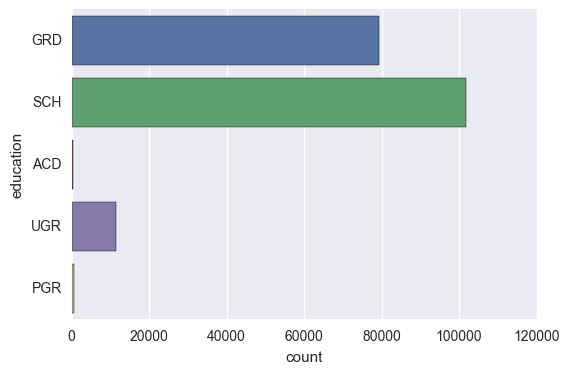

In [25]:
figsize(6, 4)
sns.countplot(y="education", data = data)

Расшифровка:

- SCH	Начальное, среднее
- PGR	Второе высшее
- GRD	Высшее
- UGR	Неполное высшее
- ACD	Ученая степень

Большая часть заемщиков имеет Начальное, среднее образование, на втором месте высшее.

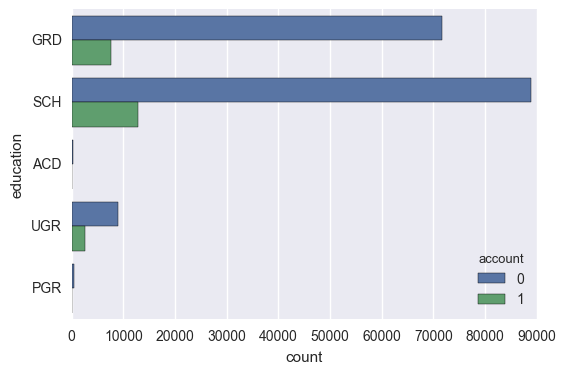

In [26]:
sns.countplot(y="education", hue = 'account', data = data)

Самая хорошая доля оформляемости у людей с неполным высшим образованием, почти треть.

Больше всего берут кредиты люди неруководящих должностей, специалисты (SPC).
Есть совсем немного руководителей среднего звена, пенсионеров и собственников бизнеса (скорее всего небольшого). По целевому признаку каких-то инсайтов я не вижу.

**Расшифровка**

- SPC	Нерук. сотр. - специалист
- DIR	Руководитель организации
- HSK	ДОМОХОЗЯЙКА
- INV	ОТСУТСТВУЕТ(ИНВАЛИД)
- WOI	Работает на ИП
- WRK	Нерук. сотр. - рабочий
- ATP	Нерук. сотр. - обсл. персонал
- WRP	Работающий пенсионер
- UMN	Руководитель подразделения
- NOR	НЕ РАБОТАЕТ
- PNS	ОТСУТСТВУЕТ(ПЕНСИОНЕР)
- BIS	Собственный бизнес
- INP	Индивидуальный предприниматель

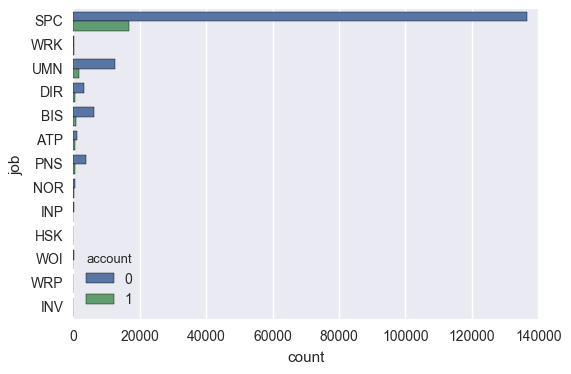

In [27]:
sns.countplot(y="job", hue ='account', data = data)

**Женщины в среднем немного чаще отказываются от кредита, чем мужчины.**

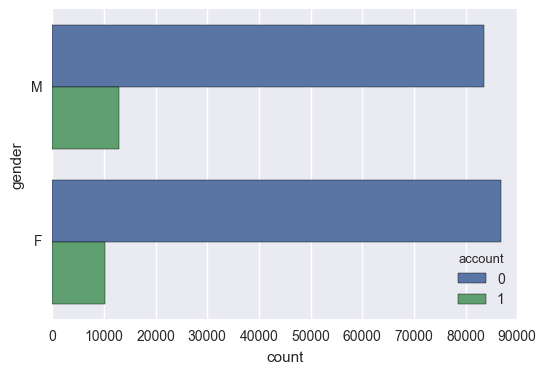

In [28]:
figsize(6, 4)
sns.countplot(y="gender", hue ='account', data = data)

И с тз семейного положения, больше всего в выборке семейных людей. Заметно, что неженатые относительно чаще соглашаются на оформление кредита.

- UNM	Холост/не замужем
- DIV	Резведен (а)
- MAR	Женат/замужем
- WID	Вдовец, вдова
- CIV	Гражданский брак

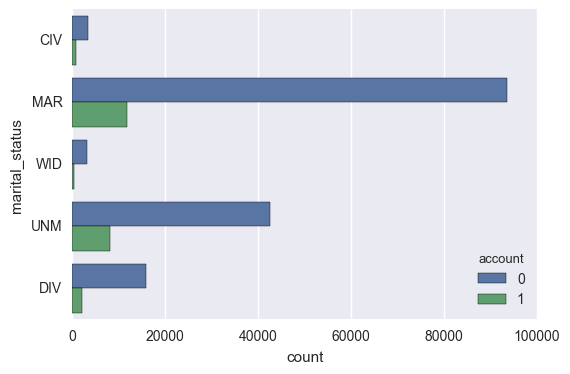

In [29]:
figsize(6, 4)
sns.countplot(y="marital_status", hue = 'account',data = data)

# 2. Заполним пропущенные данные

1. marital_status (пропущено 11658)
2. job (пропущено 7870)
3. num_loans  (пропушено 1539)
4. num_dels (пропушено 1539)
5. loan_amount (пропущено 5)
6. maturity (пропущено 5)
7. PD (пропущено 6)
8. education (пропущено 9)
9. region (пропущено 29)
10. income (пропущено 9)

все текстовые заполняем модой, числовые - медианой

In [30]:
data['marital_status'].mode()

0    MAR
dtype: object

In [31]:
data['marital_status'][data['marital_status'].isnull()] = 'MAR'

In [32]:
data['job'].mode()

0    SPC
dtype: object

In [33]:
data['job'][data['job'].isnull()] = 'SPC'

In [34]:
data['num_loans'].median()

2.0

In [35]:
data['num_loans'][data['num_loans'].isnull()] = data['num_loans'].median()

In [36]:
data['num_dels'].median()

0.0

In [37]:
data['num_dels'][data['num_dels'].isnull()] = data['num_dels'].median()

In [38]:
data['loan_amount'].median()

19520.45

In [39]:
data['loan_amount'][data['loan_amount'].isnull()] = data['loan_amount'].median()

In [40]:
data['maturity'].median()

10.0

In [41]:
data['maturity'][data['maturity'].isnull()] = data['maturity'].median()

In [42]:
data['PD'].median()

0.03836

In [43]:
data['PD'][data['PD'].isnull()] = data['PD'].median()

In [44]:
data['education'].mode()

0    SCH
dtype: object

In [45]:
data['education'][data['education'].isnull()] = 'SCH'

In [46]:
data['region'].mode()

0    ОБЛ МОСКОВСКАЯ
dtype: object

In [47]:
data['region'][data['region'].isnull()] = 'NoRegion'

In [48]:
data['income'].median()

33000.0

In [49]:
data['income'][data['income'].isnull()] = data['income'].median()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193550 entries, 73034848 to 82239219
Data columns (total 14 columns):
gender            193550 non-null object
age               193550 non-null int64
marital_status    193550 non-null object
job               193550 non-null object
loan_amount       193550 non-null float64
maturity          193550 non-null float64
tarif             193550 non-null float64
PD                193550 non-null float64
education         193550 non-null object
region            193550 non-null object
income            193550 non-null float64
num_loans         193550 non-null float64
num_dels          193550 non-null float64
account           193550 non-null int64
dtypes: float64(7), int64(2), object(5)
memory usage: 22.2+ MB


# 2. Оцифровываем признаки

5 текстовых признаков:

1) gender 193550 non-null object

2) marital_status 181892 non-null object

3) job 185680 non-null object

4) education 193541 non-null object

5) region 193521 non-null object

In [51]:
p_le = preprocessing.LabelEncoder()

In [52]:
data['gender'] = p_le.fit_transform(data['gender'])
data['marital_status'] = p_le.fit_transform(data['marital_status'])
data['job'] = p_le.fit_transform(data['job'])
data['education'] = p_le.fit_transform(data['education'])
data['region'] = p_le.fit_transform(data['region'])

In [53]:
data['education'].value_counts()

3    101784
1     79333
4     11508
2       597
0       328
Name: education, dtype: int64

# 3.  Посмотрим на признаки

In [54]:
y_train = data['account']

In [55]:
data.drop(['account'], axis=1, inplace=True)

In [56]:
train_df = data

In [57]:
train_df.describe()

,gender,age,marital_status,job,loan_amount,maturity,tarif,PD,education,region,income,num_loans,num_dels
count,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000,193550.000000
mean,0.498688,37.513702,2.163234,7.616296,23379.962758,10.495226,1.369668,0.044672,2.231522,194.534131,38307.055624,2.124815,0.037412
std,0.500000,10.696901,0.702283,1.740476,14853.108932,3.938650,0.193271,0.030229,1.061497,72.455398,23949.200711,1.816677,0.191071
min,0.000000,18.000000,0.000000,0.000000,1647.000000,3.000000,1.000000,0.000480,0.000000,0.000000,2024.000000,0.000000,0.000000
25%,0.000000,29.000000,2.000000,8.000000,12869.000000,10.000000,1.140000,0.020440,1.000000,140.000000,25000.000000,1.000000,0.000000
50%,0.000000,35.000000,2.000000,8.000000,19520.450000,10.000000,1.400000,0.038360,3.000000,194.000000,33000.000000,2.000000,0.000000
75%,1.000000,44.000000,3.000000,8.000000,29000.000000,12.000000,1.500000,0.063720,3.000000,261.000000,46000.000000,3.000000,0.000000
max,1.000000,71.000000,4.000000,12.000000,200000.000000,36.000000,1.900000,0.299450,4.000000,318.000000,900000.000000,21.000000,4.000000


# 3.1. Случайный лес

In [58]:
forest = RandomForestClassifier(n_estimators = 100, random_state =42, min_samples_leaf = 50,
                                n_jobs=-1, verbose = False, 
                                oob_score=False, class_weight='balanced_subsample')

cv_score = cross_val_score(forest, train_df, y=y_train, scoring='roc_auc', cv=5, n_jobs=-1, verbose=False)
cv_score.mean()

0.74104222525010788

** На самом простом Лесе и грязных данных получается на кросс-валидации результат 0.74 (scoring='roc_auc'), что уже неплохой показатель, можно по факту наверное получить и лучший результат. 
Посмотрим, какие признаки наиболее значимы. **

In [59]:
forest.fit(train_df, y_train)
forest.feature_importances_

array([ 0.02256248,  0.09102843,  0.02738725,  0.00845459,  0.10911031,
        0.19207314,  0.1542145 ,  0.17406208,  0.04694833,  0.06931457,
        0.05210661,  0.04647967,  0.00625804])

In [60]:
pd.DataFrame(forest.feature_importances_, train_df.columns, 
             columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
maturity,0.192073
PD,0.174062
tarif,0.154215
loan_amount,0.109110
age,0.091028
region,0.069315
income,0.052107
education,0.046948
num_loans,0.046480
marital_status,0.027387


Наиболее влияющие параметры на целевой признак:


1) Срок кредита

2) Значение вероятности дефолта

3) Тариф (спрос действительно чувствителен по цене?)

4) Размер кредита

5) Возраст



** Построим дерево **

In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(train_df, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(tree, feature_names=train_df.columns, out_file='../../my_tree.dot')
!dot -Tpng '../../my_tree.dot' -o '../gosha/my_tree.png'

Error: Could not open "../gosha/my_tree.png" for writing : No such file or directory


<img src="my_tree.png">

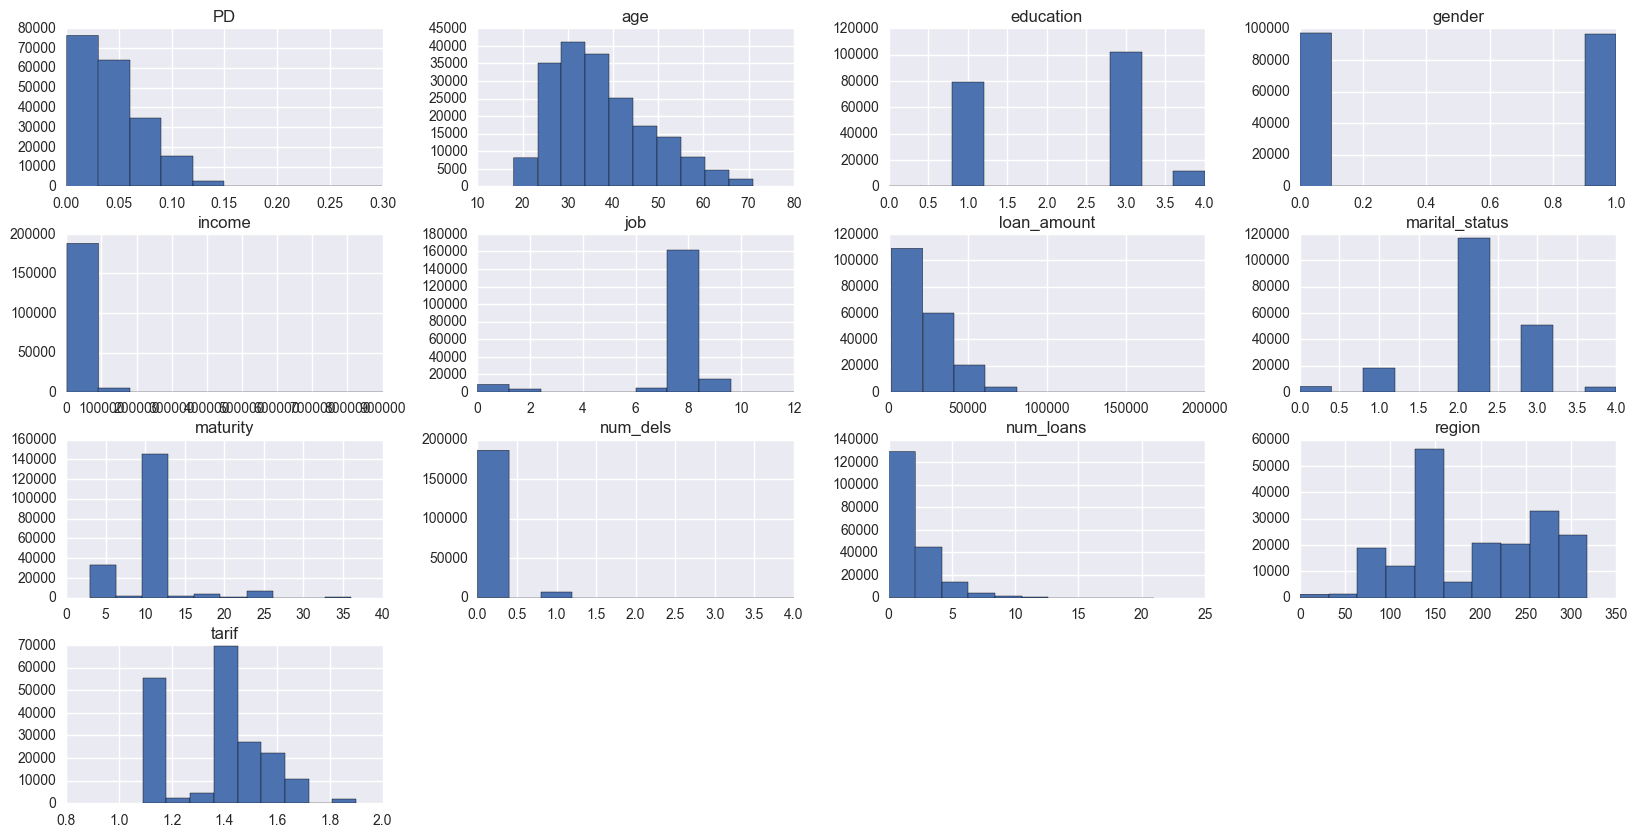

In [63]:
predictors = list(set(train_df.columns))
figsize(20, 10)
plots =data[predictors].hist()

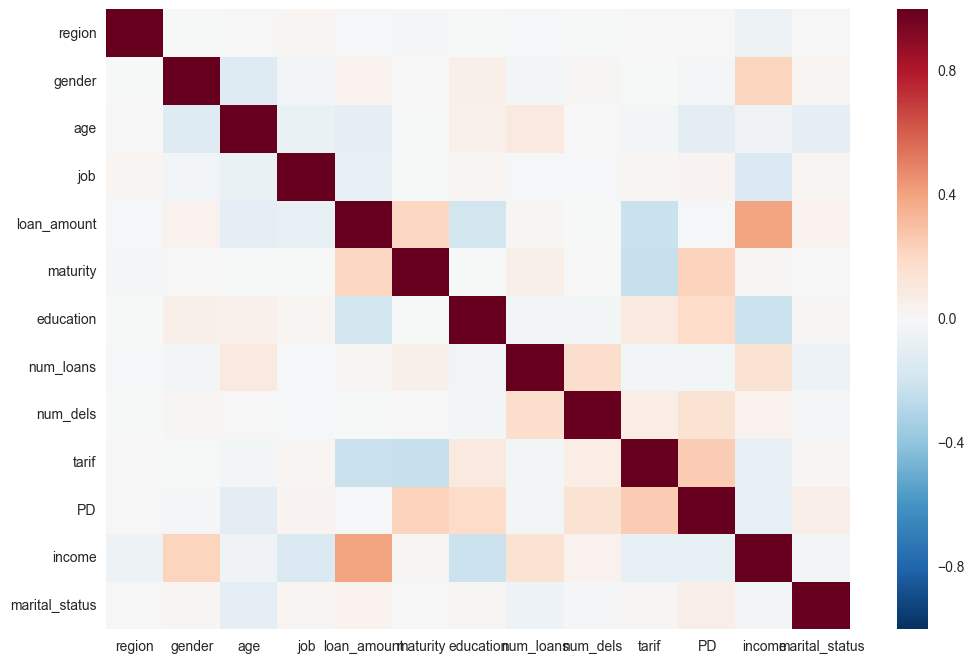

In [64]:
predictors = list(set(train_df.columns))
corr = train_df[predictors].corr()

figsize(12, 8)
sns.heatmap(corr)

In [65]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(train_df)

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

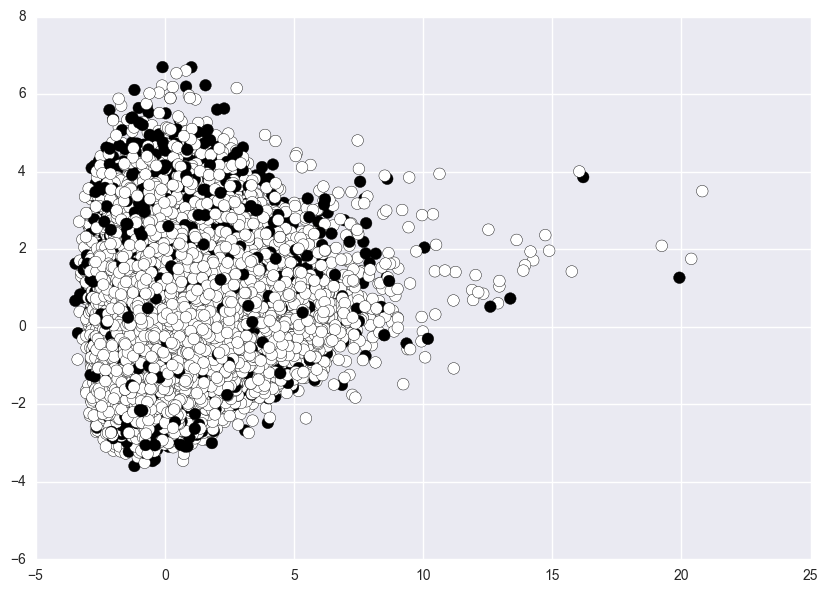

In [68]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, s=70)
plt.show()

1) есть выбросы, хвост приличный,  может влиять на результат модели

2) кучкование черных точек (тех кто взял) в кластеры не выделяется

3) нужно почистить регионы и посмотреть, будет ли разница в результатах, вполне возможно ошибка в названии региона - это дополнительных признак, влияющий на качество модели

4) также можно поискать доп. признаки:
 - группы доходов
 - группы тарифов
 - группы по вероятности дефолта